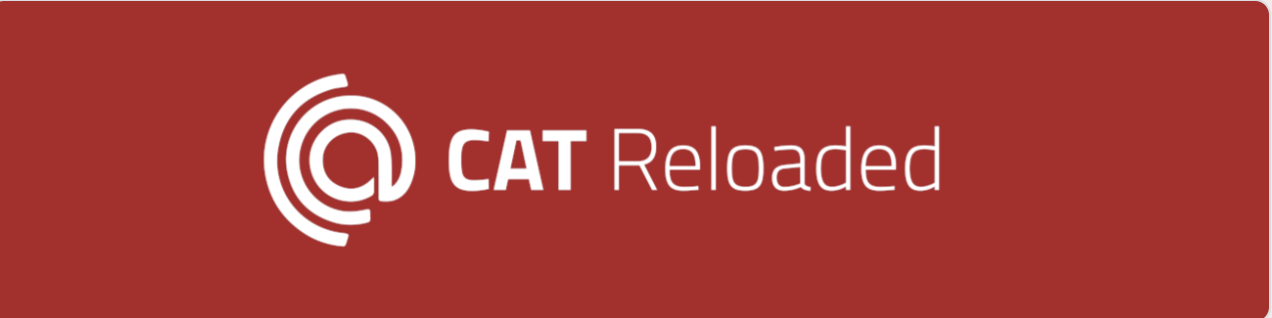

In [2]:
from IPython.display import Image 
Image("E:\\Documents\\CatReloaded-AI Roadmap\\Tasks_To_Join\\Cat_Reloaded_Img.png")  

<spin style="font-size:30px; color:green;"> **Notes to be considered:**
<br> <spin style = 'font-size: 20px; color: white;'>
<ol padding:10px>

<li>
i started the task before knowing seaborn after that i studied it -> resources : GeeksForGeeks, RealPython, ChatGpt</li><br>

<li>
you will see mixed usage for both matplotlib and seaborn</li><br>

<li>
you will see some extra and non-needed calculation -> that is before 
knowing seaborn well espacially the stat parameter </li><br>


<li>
i left one of the issues that i faced and its solution below</li><br>


</ol>

<spin style="front-size:30px"> **Used Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("E:\\Documents\\CatReloaded-AI Roadmap\\Tasks_To_Join\\Data_Visualizatoin\\Loan approval prediction.csv")

<spin style = "font-size : 30px ; color : green" >**Just for understanding and Exploring Data**

In [5]:
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [6]:
df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

<spin style = "font-size : 25px"> **Acceptance and Denied Percentages**

In [7]:
df_loan_status = df['loan_status'].value_counts().reset_index()
df_loan_status.columns = ['loan_status', 'count']
df_loan_status["loan_status"] = df_loan_status["loan_status"].map({0: 'Denied', 1: 'Approved'}).astype('category')

In [8]:
df_loan_status["Percent"] = ((df_loan_status["count"] / df_loan_status["count"].sum()) * 100).round(2)

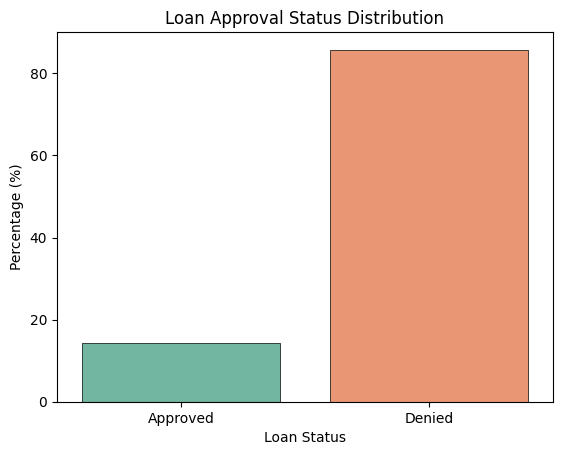

In [9]:
df_loan_status
sns.barplot(x='loan_status', y='Percent', data=df_loan_status,edgecolor='black', palette="Set2", linewidth=0.5, hue="loan_status", legend=False)
plt.xlabel("Loan Status")
plt.ylabel("Percentage (%)")
plt.title("Loan Approval Status Distribution")
plt.show()

<spin style = "font-size : 25px" > **Loan Grade Effect**

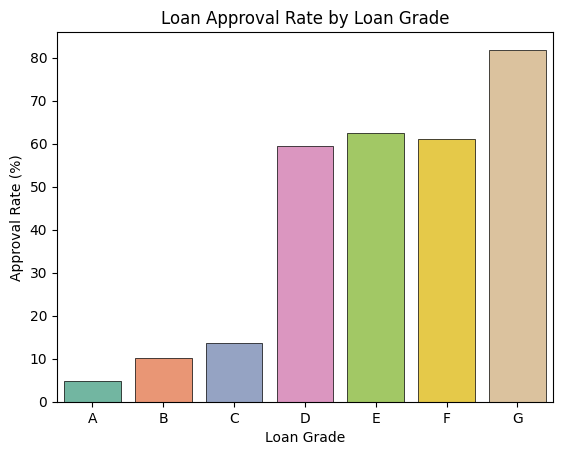

In [10]:
loan_grade_group = df.groupby("loan_grade")
loan_grade_df = (loan_grade_group["loan_status"].sum() / loan_grade_group["loan_status"].count() * 100).round(2).reset_index()
loan_grade_df.columns = ["loan_grade", "approval_rate_percentage"]
loan_grade_df
sns.barplot(x="loan_grade", y="approval_rate_percentage",data = loan_grade_df, edgecolor='black', linewidth=0.5, palette="Set2", hue="loan_grade", legend=False)
plt.ylabel("Approval Rate (%)")
plt.xlabel("Loan Grade")
plt.title("Loan Approval Rate by Loan Grade")
plt.show()


<spin style = "font-size: 25px" > **Loan Intent Effect**

In [11]:
df["loan_intent"].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [12]:
intent_group = df.groupby("loan_intent")
intent_approval = intent_group["loan_status"].sum() / intent_group["loan_status"].count() * 100
intent_approval = intent_approval.round(2).reset_index()
intent_approval

,loan_intent,loan_status
0,DEBTCONSOLIDATION,18.93
1,EDUCATION,10.77
2,HOMEIMPROVEMENT,17.37
3,MEDICAL,17.83
4,PERSONAL,13.28
5,VENTURE,9.28


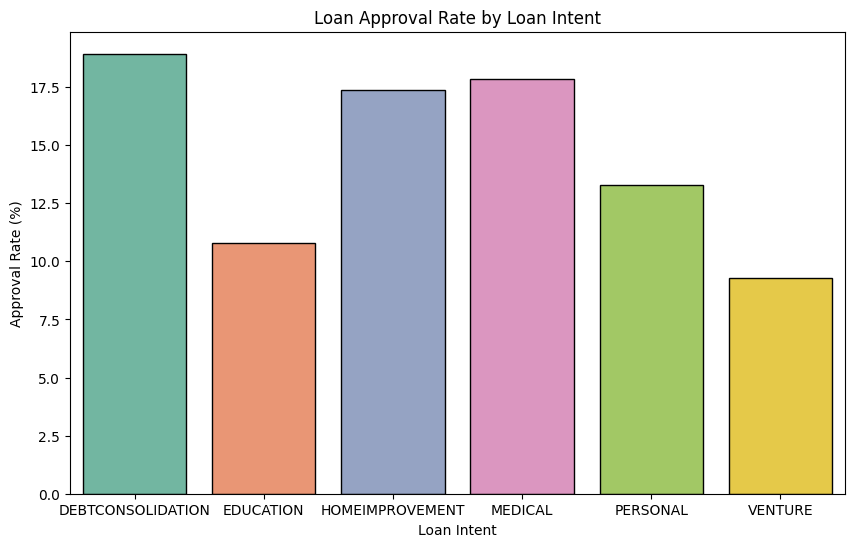

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x="loan_intent", y="loan_status", data=intent_approval, edgecolor="black", linewidth=1, palette="Set2", hue="loan_intent", legend=False)
plt.xlabel("Loan Intent")
plt.ylabel("Approval Rate (%)")
plt.title("Loan Approval Rate by Loan Intent")
plt.show()

<spin style = "font-size : 35px; color:red" > **Task Questions**

<spin style = "font-size: 30px"> **Income & Age**

<spin style = "font-size : 25px"> **Income**

<spin style = "font-size: 22px"> **Overview**

In [14]:
pd.options.display.float_format = '{:,.0f}'.format

df['person_income'].describe()

count      58,645
mean       64,046
std        37,931
min         4,200
25%        42,000
50%        58,000
75%        75,600
max     1,900,000
Name: person_income, dtype: float64

<spin style = "font-size : 20px"> **remove income outlaiers**

In [15]:
Q1 = df["person_income"].quantile(0.25)
Q3 = df["person_income"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR  #* -8400
upper_bound = Q3 + 1.5 * IQR #* 126000

In [16]:
outliers = df["person_income"] > upper_bound
df["person_income"] = df["person_income"][ ~outliers ]  

In [17]:
df["person_income"].max()

np.float64(126000.0)

<spin style = 'font-size:20px'> **Income distribution**

In [18]:
df["person_income"].sort_values(ascending=False).map(lambda x: f"{x:,.0f}").unique()

array(['126,000', '125,800', '125,600', ..., '5,000', '4,200', 'nan'],
      shape=(2386,), dtype=object)

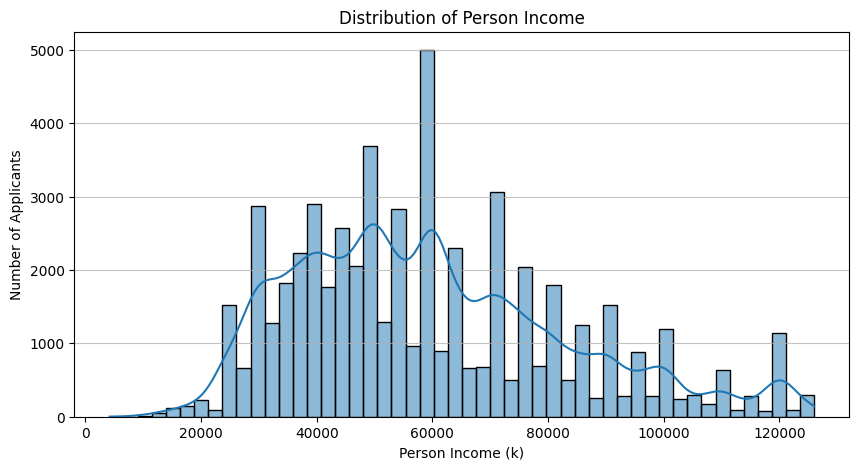

In [19]:

# income_counts = df["person_income"].value_counts().sort_index()
# list_income = income_counts.index.tolist()
# len(list_income) #2641
#! -> they were used for mathplotlib histogram bins then i learned seaborn can do it directly

plt.figure(figsize=(10, 5))
sns.histplot(data = df, x="person_income",  bins=50, edgecolor='black', kde=True, stat="count")
plt.xlabel("Person Income (k)") 
plt.ylabel("Number of Applicants")
plt.title("Distribution of Person Income")
plt.grid(axis='y', alpha=0.75) #? what is this -> answer : adds grid lines to the y-axis for better readability
plt.show() 

<spin style = "font-size : 25px "> **Age distibution**

In [20]:
df["person_age"].describe()

count   58,645
mean        28
std          6
min         20
25%         23
50%         26
75%         30
max        123
Name: person_age, dtype: float64

In [21]:
df["person_age"].value_counts().sort_values(ascending=False).head(10)

person_age
23    7726
22    7051
24    6395
25    5067
27    4450
26    3874
28    3707
29    3270
30    2333
31    1917
Name: count, dtype: int64

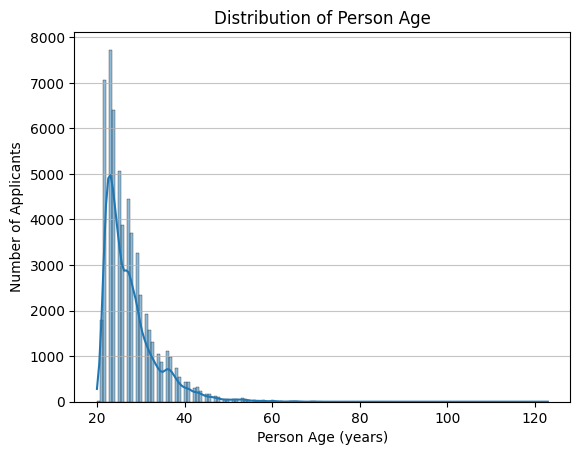

In [22]:

sns.histplot(data=df, x='person_age', bins=150, edgecolor='black', kde=True, stat="count")
plt.xlabel("Person Age (years)")
plt.ylabel("Number of Applicants")
plt.title("Distribution of Person Age")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [23]:
Age_group = df.groupby("person_age")
age_df = Age_group.agg(Approval_rate =("loan_status", "mean"), Approval_count=("loan_status", "sum"), Allocation_count=("loan_status", "count")).reset_index()
age_df["Approval_rate"] = (age_df["Approval_rate"] * 100).round(2)
age_df.rename(columns={"person_age": "Age", "Approval_rate": "Approval_rate_percentage"}, inplace=True)
age_df.sort_values(by="Age", ascending=True).head(10)

,Age,Approval_rate_percentage,Approval_count,Allocation_count
0,20,25,3,12
1,21,17,307,1795
2,22,16,1130,7051
3,23,14,1067,7726
4,24,14,898,6395
5,25,15,750,5067
6,26,15,573,3874
7,27,12,530,4450
8,28,14,522,3707
9,29,13,430,3270


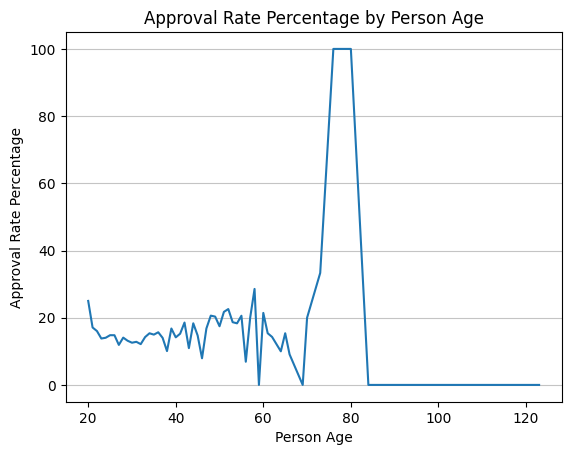

In [24]:

plt.plot(age_df["Age"], age_df["Approval_rate_percentage"])
plt.xlabel("Person Age")
plt.ylabel("Approval Rate Percentage")
plt.title("Approval Rate Percentage by Person Age")
plt.grid(axis='y', alpha=0.75)
plt.show()

<spin style="font-size:25px; color:red;"> **Note: Because of small number of applicants with highly age, its results are not trusted** 
<spin style = "font-size:23px; color:skyblue;"> **To solve that i will add the count of each segement to the visualization**

In [25]:
labels = ["20-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80", "80+"]
age_categories = pd.cut(age_df["Age"], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, age_df["Age"].max()], labels=labels, include_lowest=True)
age_df["Age_Group"] = age_categories
age_df

,Age,Approval_rate_percentage,Approval_count,Allocation_count,Age_Group
0,20,25,3,12,20-25
1,21,17,307,1795,20-25
2,22,16,1130,7051,20-25
3,23,14,1067,7726,20-25
4,24,14,898,6395,20-25
5,25,15,750,5067,20-25
6,26,15,573,3874,26-30
7,27,12,530,4450,26-30
8,28,14,522,3707,26-30
9,29,13,430,3270,26-30


In [26]:
age_segments_df = age_df.groupby("Age_Group").agg( 
    Approval_count = ("Approval_count", "sum"),
    Allocation_count = ("Allocation_count", "sum")
).reset_index()

age_segments_df["Approval_rate_percentage"] = (age_segments_df["Approval_count"] / age_segments_df["Allocation_count"] * 100).round(2)
age_segments_df

C:\Users\ASUD Vivo\AppData\Local\Temp\ipykernel_22896\4127297611.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segments_df = age_df.groupby("Age_Group").agg(


,Age_Group,Approval_count,Allocation_count,Approval_rate_percentage
0,20-25,4155,28046,15
1,26-30,2348,17634,13
2,31-35,911,6691,14
3,36-40,541,3828,14
4,41-45,221,1436,15
5,46-50,77,508,15
6,51-55,61,300,20
7,56-60,23,123,19
8,61-65,6,43,14
9,66-70,3,27,11


<spin style="font-size:30px; color:pink;">  **This photo is miss-leading**

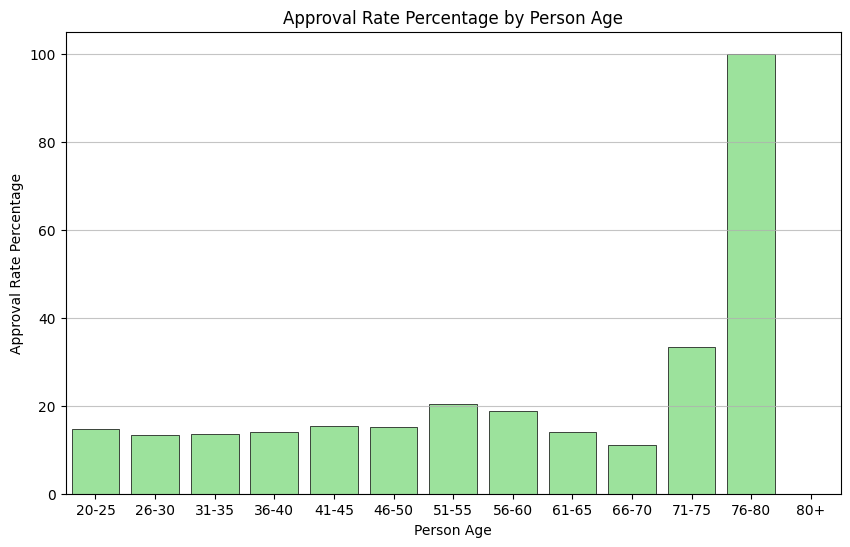

In [27]:
plt.figure(figsize=(10, 6))
bars = sns.barplot(x="Age_Group", y="Approval_rate_percentage", data=age_segments_df, color="lightgreen", edgecolor='black', linewidth=0.5, legend=True)
plt.xlabel("Person Age")
plt.ylabel("Approval Rate Percentage")
plt.title("Approval Rate Percentage by Person Age")
plt.grid(axis='y', alpha=0.75)


<spin style="font-size:25px; color:green;"> **Enhanced Visulization**

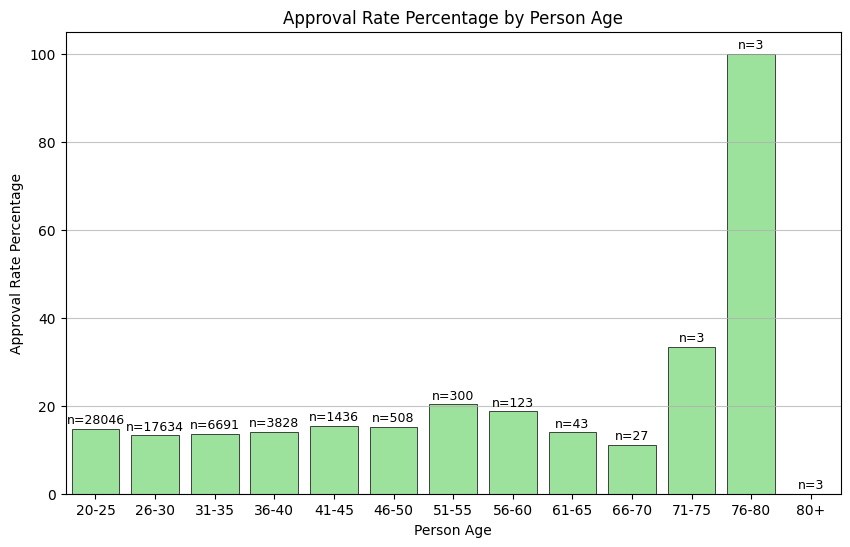

In [28]:
plt.figure(figsize=(10, 6))
bars = sns.barplot(x="Age_Group", y="Approval_rate_percentage", data=age_segments_df, color="lightgreen", edgecolor='black', linewidth=0.5, legend=True)
plt.xlabel("Person Age")
plt.ylabel("Approval Rate Percentage")
plt.title("Approval Rate Percentage by Person Age")
plt.grid(axis='y', alpha=0.75)

for i, row in age_segments_df.iterrows():
    plt.text(
        i,                                
        row["Approval_rate_percentage"] + 0.5, 
        f'n={row["Allocation_count"]}',       
        ha='center',
        va='bottom',
        fontsize=9
    )


plt.show()

<spin style="font-size:30px ; color:skyblue"> **Income Affects approval**

<spin style = "font-size:20px"> **preparing data for income distribution**

In [29]:
labels = ["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100","100+"]
bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, df["person_income"].max()+1]
df['income_category'] = pd.cut(df['person_income'], bins=bins, labels=labels, include_lowest=True)


C:\Users\ASUD Vivo\AppData\Local\Temp\ipykernel_22896\2099837422.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_category_group = df.groupby(["income_category"])


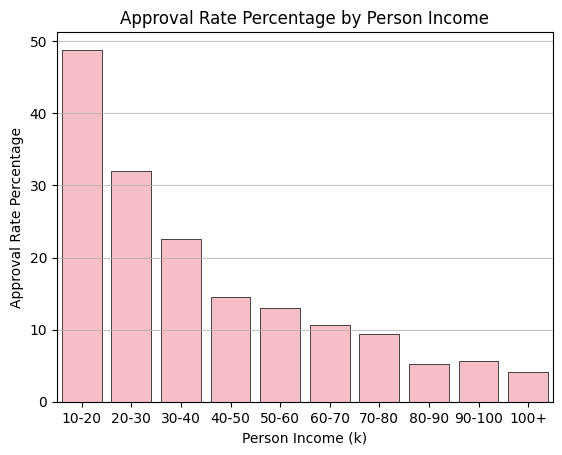

In [30]:
income_category_group = df.groupby(["income_category"])
income_df = (income_category_group["loan_status"].sum() / income_category_group["loan_status"].count() * 100).round(2).reset_index()
income_df.columns = ["Income_Category", "Approval_Rate_Percentage"]
income_df.sort_values(by=[ "Income_Category"], ascending=True)

sns.barplot(x="Income_Category", y="Approval_Rate_Percentage", data=income_df, color="lightpink", edgecolor='black', linewidth=0.5)
plt.xlabel("Person Income (k)")
plt.ylabel("Approval Rate Percentage")
plt.title("Approval Rate Percentage by Person Income")
plt.grid(axis='y', alpha=0.75)
plt.show()

<spin style = "font-size:30px; color:skyblue;"> **Loan Purpose distribution**

In [31]:
df["loan_intent"].dtype

dtype('O')

In [32]:
df["loan_intent"].astype('category')

0        EDUCATION
1          MEDICAL
2         PERSONAL
3          VENTURE
4          MEDICAL
           ...    
58640    EDUCATION
58641      MEDICAL
58642    EDUCATION
58643    EDUCATION
58644      VENTURE
Name: loan_intent, Length: 58645, dtype: category
Categories (6, object): ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']

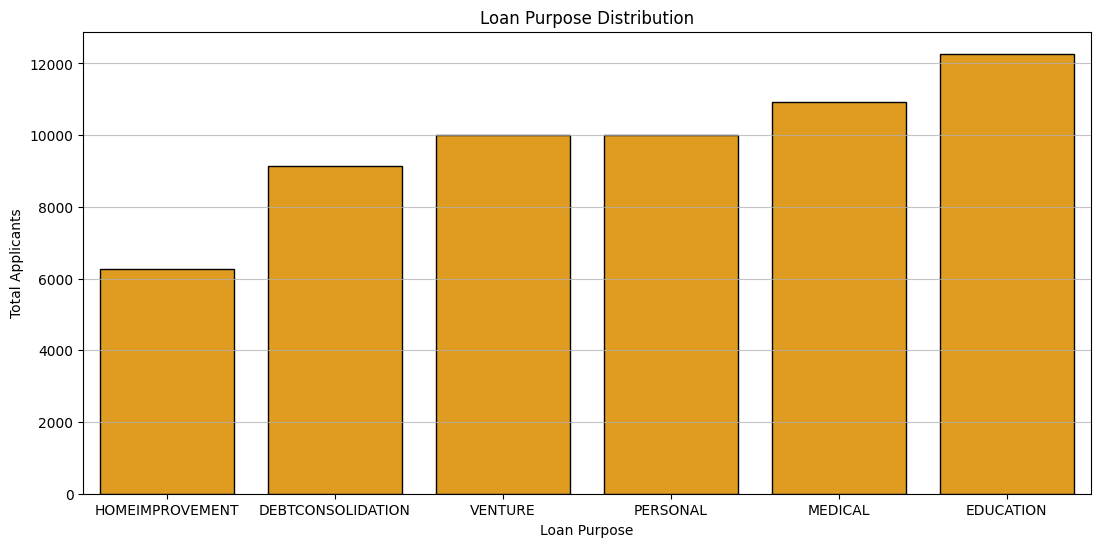

loan_intent
HOMEIMPROVEMENT       6280
DEBTCONSOLIDATION     9133
VENTURE              10011
PERSONAL             10016
MEDICAL              10934
EDUCATION            12271
Name: count, dtype: int64

In [33]:
# plt.bar(df["loan_intent"].value_counts().index, df["loan_intent"].value_counts().values, color='orange', edgecolor='black')
plt.figure(figsize=(13,6))
loan_purpose_counts = df["loan_intent"].value_counts().sort_values()
sns.barplot(x=loan_purpose_counts.index, y=loan_purpose_counts.values, color='orange', edgecolor='black', linewidth=1)
plt.xlabel("Loan Purpose")
plt.ylabel("Total Applicants")
plt.title("Loan Purpose Distribution")
plt.grid(axis='y', alpha=0.75)
plt.show()

loan_purpose_counts

Text(0.5, 1.0, 'Loan Approval Rate by Loan Purpose')

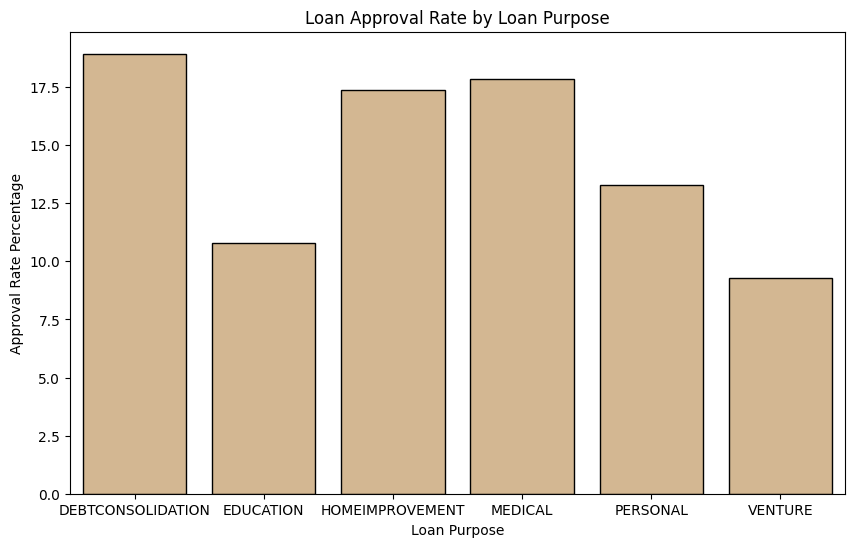

In [34]:
purpose_group = df.groupby("loan_intent")
purpose_approval_df = purpose_group["loan_status"].sum() / purpose_group["loan_status"].count() * 100
purpose_approval_df = purpose_approval_df.round(2).reset_index()
purpose_approval_df.columns = ["Purpose", "approval_rate_percentage"]

#! task : use seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Purpose", y="approval_rate_percentage", data=purpose_approval_df, color="burlywood", edgecolor="black", linewidth=1)
plt.xlabel("Loan Purpose")
plt.ylabel("Approval Rate Percentage")
plt.title("Loan Approval Rate by Loan Purpose")

<spin style = "font-size:30px; color:skyblue;"> **Home Ownership & Loan Approval**

In [35]:
df["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [36]:
df["person_home_ownership"] = df["person_home_ownership"].astype("category")

<spin style="font-size:20px; color:orange"> **Q1 answer - the most common home-ownership category (Mortgage, Rent, Own, etc.) among approved applicants**

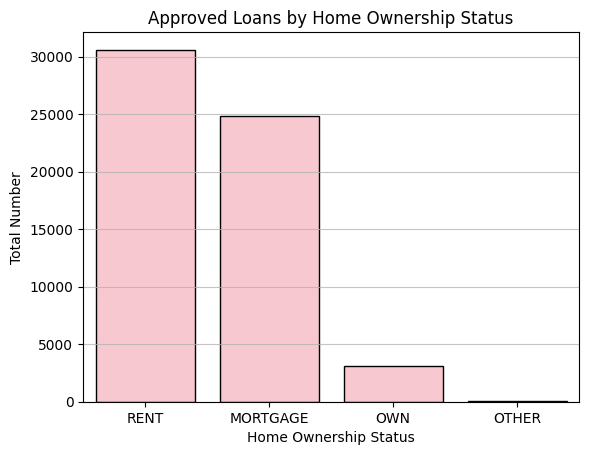

In [37]:
home_ownership_status = df["person_home_ownership"].value_counts().sort_values(ascending=False)
sns.barplot(x = home_ownership_status.index, y=home_ownership_status.values, edgecolor='black', linewidth=1, order=home_ownership_status.index, color = "pink")
plt.grid(axis='y', alpha=0.75)
plt.ylabel("Total Number")
plt.xlabel("Home Ownership Status")
plt.title("Approved Loans by Home Ownership Status")
plt.show()

Text(0.5, 1.0, 'Approved Loans by Home Ownership Status')

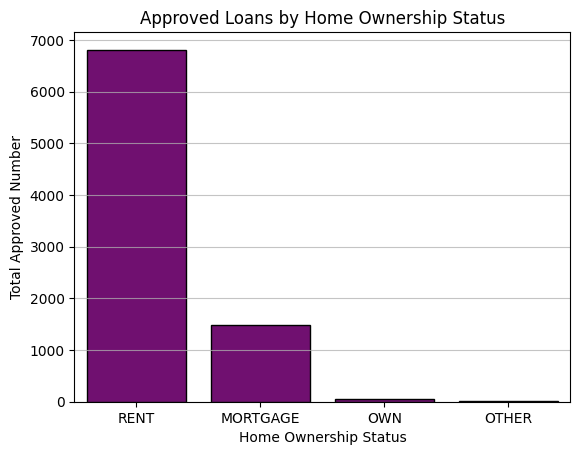

In [38]:
filt  = df["loan_status"] == 1
home_ownership_status = df[filt]["person_home_ownership"].value_counts().sort_values(ascending=False)
sns.barplot(x = home_ownership_status.index, y=home_ownership_status.values, edgecolor='black', linewidth=1, order=home_ownership_status.index, color = "purple")
plt.grid(axis='y', alpha=0.75)
plt.ylabel("Total Approved Number")
plt.xlabel("Home Ownership Status")
plt.title("Approved Loans by Home Ownership Status")

# home_ownership_status


<spin style = "font-size:20px; color : orange;"> **Does owning a home with a mortgage correlate with a higher likelihood of loan approval = ```No```**

In [39]:
person_home_status_group = df.groupby("person_home_ownership")
person_home_approval_df = person_home_status_group.size().reset_index()
person_home_approval_df.rename(columns={0: "All"}, inplace=True)
person_home_approval_df["Approval_rate_percentage"] = (person_home_status_group["loan_status"].sum() / person_home_status_group["loan_status"].count() * 100).round(2)

person_home_approval_df

C:\Users\ASUD Vivo\AppData\Local\Temp\ipykernel_22896\303629481.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  person_home_status_group = df.groupby("person_home_ownership")


,person_home_ownership,All,Approval_rate_percentage
0,MORTGAGE,24824,NaN
1,OTHER,89,NaN
2,OWN,3138,NaN
3,RENT,30594,NaN


<spin style = "font-size:20px; color:red;"> **Fix the Nan issue**

<spin style="font-size:20px"> **The issue because of adding a series to a dataframe which is with a different index -> leading tp Nan**
**My solution is to get the count by another way ```size().values``` to have the same index**

In [40]:
type(person_home_status_group.size().values)

numpy.ndarray

In [41]:
(person_home_status_group["loan_status"].sum() / person_home_status_group["loan_status"].count() * 100).round(2)

person_home_ownership
MORTGAGE    6
OTHER      17
OWN         1
RENT       22
Name: loan_status, dtype: float64

In [42]:
homeownership_approval_df = (person_home_status_group["loan_status"].sum() / person_home_status_group["loan_status"].count() * 100).round(2)
homeownership_approval_df = homeownership_approval_df.reset_index()
homeownership_approval_df["All Applicants"] = person_home_status_group.size().values
homeownership_approval_df.columns = ["Home_Ownership_Status", "Approval_Rate_Percentage%", "All"]
homeownership_approval_df["Approved_Count"] = (homeownership_approval_df["Approval_Rate_Percentage%"] / 100 * homeownership_approval_df["All"]).round(0).astype(int)
homeownership_approval_df


,Home_Ownership_Status,Approval_Rate_Percentage%,All,Approved_Count
0,MORTGAGE,6,24824,1482
1,OTHER,17,89,15
2,OWN,1,3138,43
3,RENT,22,30594,6810


In [43]:

#* to make sure with the results 
accept_filt = (df["loan_status"] == 1)
accept = df[accept_filt]["person_home_ownership"].value_counts()
all = df["person_home_ownership"].value_counts()
percent = (accept / all * 100).round(2)
percent


person_home_ownership
RENT       22
MORTGAGE    6
OWN         1
OTHER      17
Name: count, dtype: float64

<spin style = "font-size:23px; color:green;"> **Issue is fiexed**

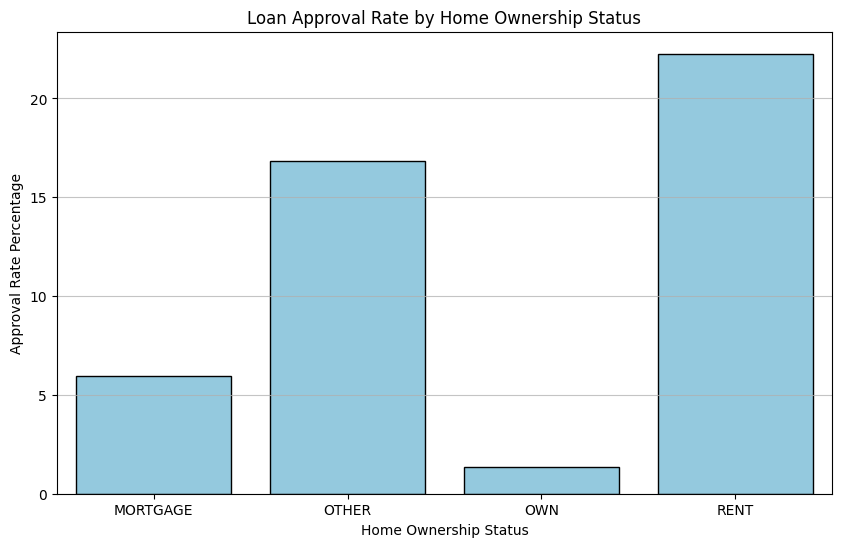

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Home_Ownership_Status", y="Approval_Rate_Percentage%", data=homeownership_approval_df, color = "skyblue", edgecolor="black", linewidth=1)
plt.xlabel("Home Ownership Status")
plt.ylabel("Approval Rate Percentage")
plt.title("Loan Approval Rate by Home Ownership Status")
plt.grid(axis='y', alpha=0.75)
plt.show()


<spin style = "font-size:20px; color:orange;"> **what do you think is the actual reason?** 
```answer``` **based on last pictures i found after analysis that:** 


<spin style = "font-size:25px; color:white;"> **The best i cloud provide is :**<br><br>
<spin style= "font-size:20px"> the best case for being accepted
<ol style = "font-size:20px; color: skyblue;">
<li >
low income</li>

<li>
medical purpose </li>

<li>
 and being in fifties </li>

</ol>